<h1> <center> Titanic Hands on Example</h1> </center>
 <img width="150"  align="right" src="tbyds.jpg">
The steps:
1. Asking the right question
2. Identifying and preparing the right data.
3. Select a ML Algorithm and apply the algorithm to get a candidate model.  (A.K.A. Training the model).
4. Evaluate our results and adjust where needed.  
5. Present the model and reiterate (good models only get better).  



Main Kaggle Titanic Page: https://www.kaggle.com/c/titanic

## 1. Asking the right question
### 1. 1 Trying to predict survived.
- What kind of ML problem is this?
- Women and children?  (Gender and Age)
- How did class play out?


## 2. Identifying and preparing the right data.
### 2.1 - Reviewing the data we have (general review)

In [1]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import various algorithms for later
from sklearn import linear_model, preprocessing, tree, model_selection, svm
from sklearn.naive_bayes import GaussianNB

#READ DATA FRAME
train_df=pd.read_csv("./train.csv")

#REVIEW DATA
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [2]:
#REVIEW DATA FORMAT 

train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Observe!
- Notice null values - 891 entries, but only:
    - 714 age
    - 204 cabin 
    - 889 embarked  
- Where are there mismatched types?
    - Gender?
    
- Feature selection
    - Ask yourself- what features do we need?
    - Embarked?
    - Cabin?
    - What's relevant?

0    549
1    342
Name: Survived, dtype: int64


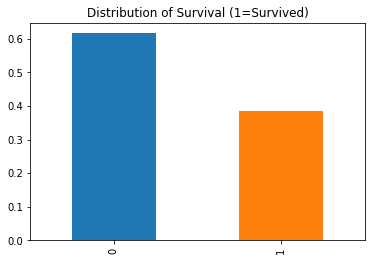

In [3]:
#Distribution of survival 
print(train_df.Survived.value_counts())

train_df.Survived.value_counts(normalize=True).plot(kind="bar")
plt.title("Distribution of Survival (1=Survived)")
plt.show()

male      577
female    314
Name: Sex, dtype: int64


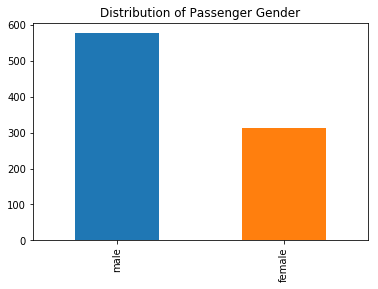

In [4]:
#Distribution of passenger gender 
print(train_df.Sex.value_counts())
train_df.Sex.value_counts().plot(kind="bar")
plt.title("Distribution of Passenger Gender")
plt.show()

In [5]:
#Age Histogram
train_df["Age"].hist(bins=100) 
plt.title("Age Histogram")
plt.show()

In [6]:
#Distribution of passengers by class
print(train_df.Pclass.value_counts())
train_df.Pclass.value_counts().plot(kind="bar")
plt.title("Distribution in passenger classes")
plt.show()

3    491
1    216
2    184
Name: Pclass, dtype: int64


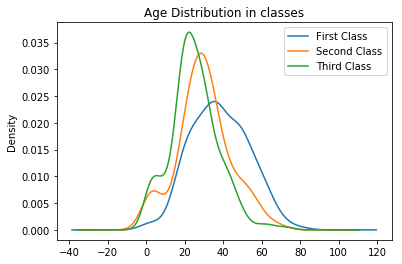

In [7]:
#Class in respect to age
for x in [1,2,3]:
    train_df.Age[train_df.Pclass==x].plot(kind="kde")
    
plt.title("Age Distribution in classes")
plt.legend(("First Class","Second Class","Third Class"))
plt.show()


S    644
C    168
Q     77
Name: Embarked, dtype: int64


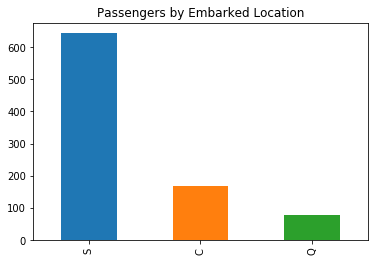

In [8]:
#Embarked locations
print(train_df.Embarked.value_counts())
train_df.Embarked.value_counts().plot(kind='bar')
plt.title("Passengers by Embarked Location")
plt.show()

## 2. Identifying and preparing the right data.
### 2.2 - Reviewing the data we have (in regards to survival rate)

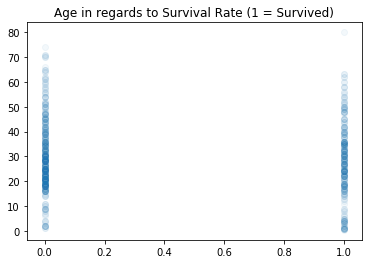

In [9]:
#Age in regards to survival rate
plt.scatter(train_df.Survived,train_df.Age,alpha=0.05)
plt.title("Age in regards to Survival Rate (1 = Survived)")
plt.show()

In [10]:
#Gender of survived 
print(train_df.Sex[train_df.Survived == 1].value_counts())
train_df.Sex[train_df.Survived == 1].value_counts(normalize=True).plot(kind="bar")
plt.title("Gender distribution of those that survived")
plt.show()

female    233
male      109
Name: Sex, dtype: int64


In [11]:
#Survival rate by gender 
print(train_df.groupby('Sex').Survived.mean())
train_df.groupby('Sex').Survived.mean().plot(kind="bar")
plt.title("Distribution of survival rate by gender")
plt.show()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


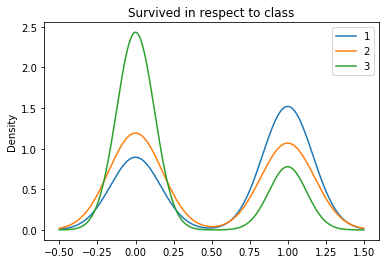

In [12]:
#Class in respect to survived
for x in [1,2,3]:
    train_df.Survived[train_df.Pclass==x].plot(kind="kde")
    
plt.title("Survived in respect to class")
plt.legend(("1","2","3"))
plt.show()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


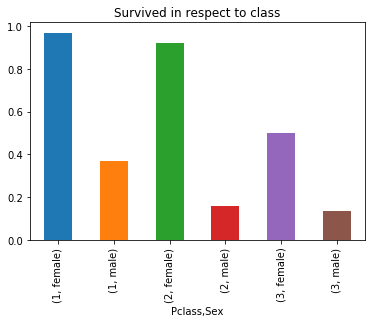

In [13]:
print(train_df.groupby(['Pclass', 'Sex']).Survived.mean())
train_df.groupby(['Pclass', 'Sex']).Survived.mean().plot(kind="bar")
plt.title("Survived in respect to class")
plt.show()

## 2. Identifying and preparing the right data.
### 2.3 - Remove the features we don't need.

In [14]:
features =  ['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare']
train_df = train_df[features]
train_df.head()

#note that - we could also use features_v = train_df.drop(['Name','Ticket','Cabin','Embarked'],axis=1)

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0            1         0       3    male  22.0      1      0   7.2500
1            2         1       1  female  38.0      1      0  71.2833
2            3         1       3  female  26.0      0      0   7.9250
3            4         1       1  female  35.0      1      0  53.1000
4            5         0       3    male  35.0      0      0   8.0500

## 2. Identifying and preparing the right data.
### 2.4 - Correct data types - Gender

In [15]:
# Convert the male and female groups to integer form
train_df.Sex = train_df.Sex.map({"male": 0, "female":1})
train_df.info()
train_df.head()

#note - factorize could be helpful here, but causes an ugly error message 
#"A value is trying to be set on a copy of a slice from a DataFrame."
#turn off warning http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

#code:
#pd.options.mode.chained_assignment = None  # default='warn' 
#train_df['Sex']=train_df.factorize(train_df['Sex'])[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0            1         0       3    0  22.0      1      0   7.2500
1            2         1       1    1  38.0      1      0  71.2833
2            3         1       3    1  26.0      0      0   7.9250
3            4         1       1    1  35.0      1      0  53.1000
4            5         0       3    0  35.0      0      0   8.0500

## 2. Identifying and preparing the right data.
### 2.5 - Fill in average age


In [16]:
#Naive way to do this below
#train_df=train_df.dropna()
#train_df.info()

#A basic mean would look as follows:
train_df["Age"]=train_df["Age"].fillna(train_df["Age"].dropna().median())
train_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


## 3. Select a ML Algorithm and apply the algorithm to get a candidate model.  (A.K.A. Training the model).
### 3.1 Setup

In [17]:
#simple model (If you're a woman, I'll guess you'll survive!)

train_df["Hypothesis"]=0 
train_df.loc[train_df.Sex == 1,"Hypothesis"]=1 

train_df["Result"]=0
train_df.loc[train_df.Survived == train_df["Hypothesis"],"Result"]=1
             
print(train_df["Result"].value_counts(normalize=True))

1    0.786756
0    0.213244
Name: Result, dtype: float64


In [18]:
#Regression

In [19]:
#Setting up for models
training_feature_names=["Pclass","Age","Fare","Sex","SibSp","Parch"]
training_target=train_df["Survived"].values  #array of survived 
training_features=train_df[training_feature_names].values  #array of the features 

In [20]:
MLalgorithm = linear_model.LogisticRegression(solver="liblinear")

#Linear Model
MLmodel  = MLalgorithm.fit(training_features,training_target)
print ("Linear model score:", MLmodel.score(training_features,training_target))

scores = model_selection.cross_val_score(MLalgorithm,training_features,training_target,scoring='accuracy',cv=50)
print(scores.mean())

#Polynomial Model
poly = preprocessing.PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(training_features)
MLmodel  = MLalgorithm.fit(poly_features,training_target)
print ("Polynomial model score:", MLmodel.score(poly_features,training_target))

scores = model_selection.cross_val_score(MLalgorithm,poly_features,training_target,scoring='accuracy',cv=50)
print(scores.mean())

Linear model score: 0.8002244668911336
0.7938316993464052
Polynomial model score: 0.8271604938271605
0.8174264705882354


In [21]:
#Trees (overfit)

In [22]:
MLalgorithm = tree.DecisionTreeClassifier(random_state=1)
MLmodel = MLalgorithm.fit(training_features,training_target)
print("Decision tree score:",MLmodel.score(training_features,training_target))

scores = model_selection.cross_val_score(MLalgorithm,poly_features,training_target,scoring='accuracy',cv=50)
print(scores.mean())

Decision tree score: 0.9797979797979798
0.767312091503268


## What overfit looks like

![Tree Overfit](tree-overfit.png)

## 4. Evaluate our results and adjust where needed

In [23]:
MLalgorithm = tree.DecisionTreeClassifier(random_state=1,max_depth=3,min_samples_split=4)
MLmodel = MLalgorithm.fit(training_features,training_target)

print("Decision tree score:",MLmodel.score(training_features,training_target))
scores = model_selection.cross_val_score(MLalgorithm,poly_features,training_target,scoring='accuracy',cv=50)
print(scores.mean())


Decision tree score: 0.8271604938271605
0.7823937908496732


## Much Different model (and improved result). 
![Tree Pruned](tree-pruned.png)

## 5. Present the model and reiterate (good models only get better).
